In [1]:
import sys

import pandas as pd
import numpy as np
from scipy import signal

import seaborn as sns
import matplotlib.pyplot as plt

from datetime import datetime

import sqlite3 as lite
# conn = lite.connect('/Users/b/Library/Containers/com.hesterlab.smartppe.facebit-app/Data/Documents/db.sqlite')
conn = lite.connect('/Users/b/Downloads/db_d.sqlite')

In [2]:
def plot(df, event_id):
    pressure = df.where(df['type'] == 'pressure')
    temp = df.where(df['type'] == 'temperature')

    f, axarr = plt.subplots(2, figsize=(12,12), sharex=True)

    ax1 = sns.lineplot(
        x='datetime',
        y='value',
        data=pressure,
        color='r',
        label='pressure',
        ax=axarr[0]
    )
    ax1.set_title(f'Event {event_id}: Pressure')
    ax1.set_ylabel("mBar")

    ax2 = sns.lineplot(
        x='datetime',
        y='value',
        data=temp,
        color='b',
        label='temperature',
        ax=axarr[1]
    )
    ax2.set_title(f'Event {event_id}: Temperature')
    ax2.set_ylabel("Celsius")
    ax2.set_xlabel("Time (UTC)")

    plt.legend()
    return plt

In [3]:
def save_and_plot_events(event_df):
    for i, row in event_df.iterrows():
        time_series_query = f'''
            SELECT t.id, t.value, t.date, t.type, e.id as event_id, e.event_type 
            FROM time_series_measurement as t
            LEFT JOIN event as e ON e.id = t.event_id
            WHERE e.id == {row['id']}
            ORDER BY t.date DESC
        '''
        df = pd.read_sql_query(time_series_query, conn)

        # map date to datetime64
        df['datetime'] = df['date'].map(lambda date: datetime.strptime(date, '%Y-%m-%dT%H:%M:%S.%fZ'))
        plt = plot(df, row['id'])

        name = f'{row["event_type"]}_{row["id"]}'

        plt.savefig(f'events/{name}.png')
        df.to_csv(f'events/{name}.csv')

In [4]:
events_query = """
    SELECT * FROM event
"""

df_events = pd.read_sql_query(events_query, conn)
df_events.head(10)

,id,event_type,other_event_label,notes,start_date,end_date
0,1,other,Other,trying to mess it up,2021-02-03T03:22:25.826Z,2021-02-03T03:22:48.891Z
1,2,normal_breathing,,Sitting at desk kn95. No case,2021-02-03T03:23:45.681Z,2021-02-03T03:24:47.175Z
2,3,normal_breathing,,sitting at desk. Kn95. no case.,2021-02-03T03:30:06.226Z,2021-02-03T03:30:57.266Z
3,4,normal_breathing,,Sitting at desk. kn95. No case,2021-02-03T03:33:38.046Z,2021-02-03T03:35:19.204Z
4,5,normal_breathing,,,2021-02-03T03:36:48.737Z,2021-02-03T03:38:02.456Z


No handles with labels found to put in legend.


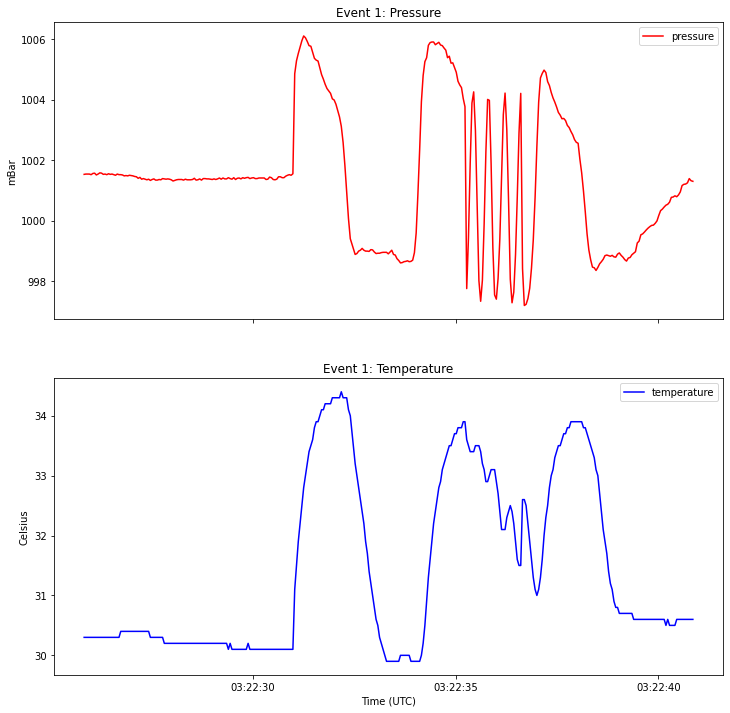

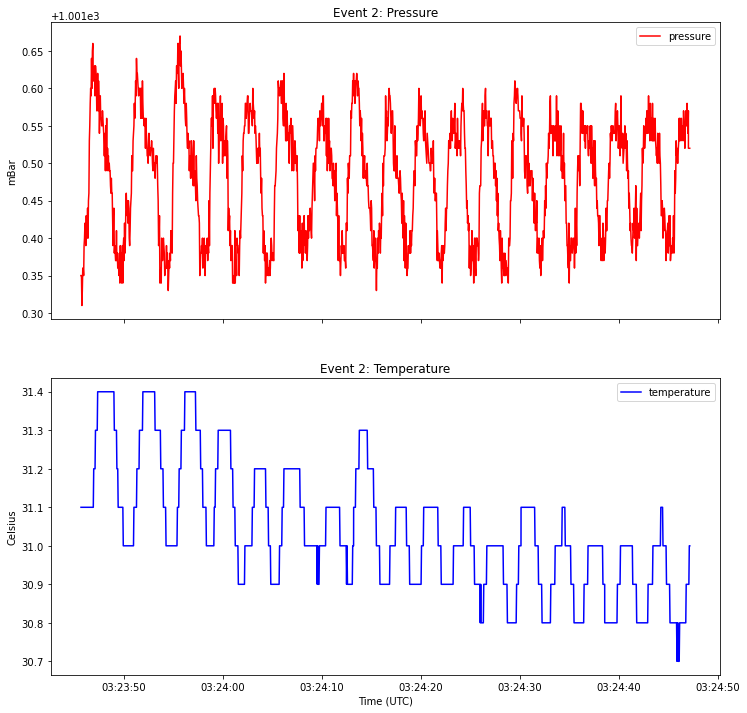

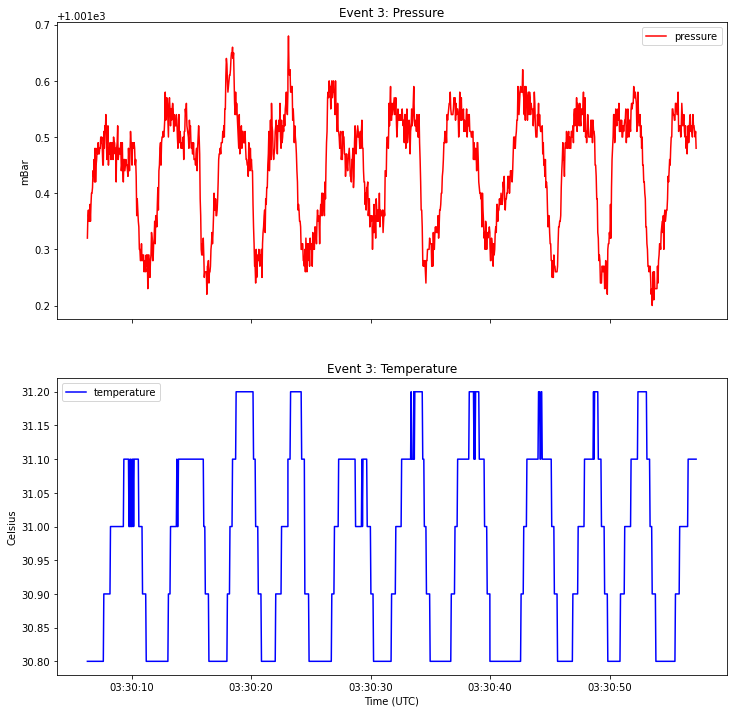

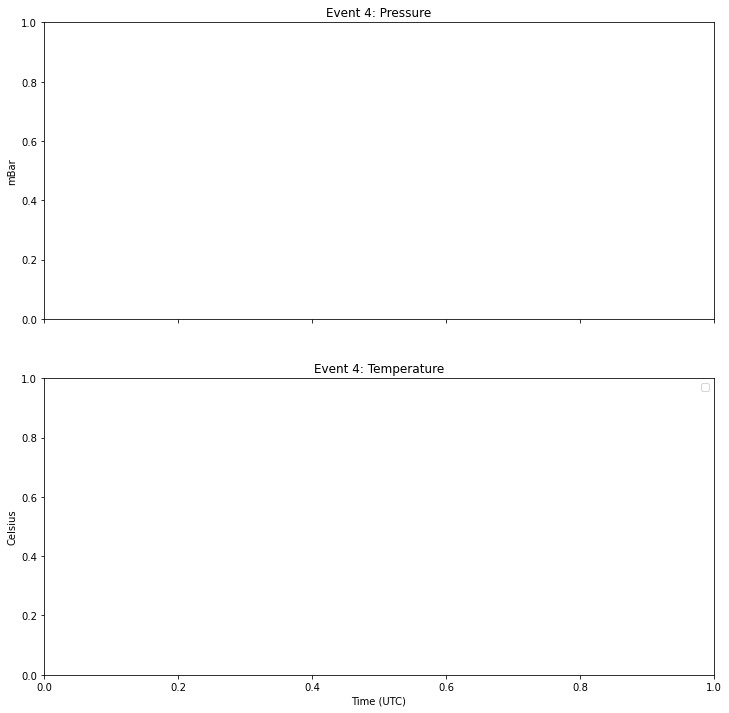

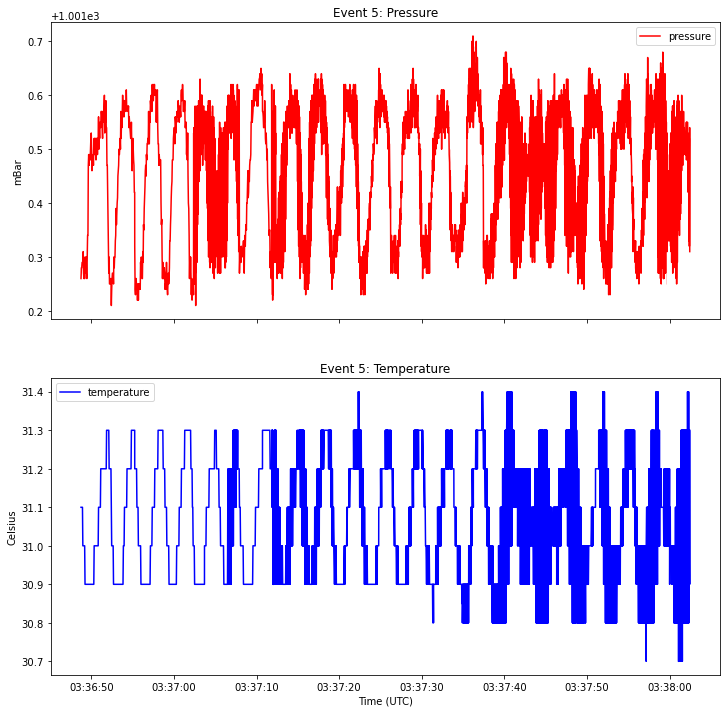

In [5]:
save_and_plot_events(df_events)

In [21]:
time_series_query = f'''
            SELECT t.id, t.value, t.date, t.type, e.id as event_id, e.event_type 
            FROM time_series_measurement as t
            LEFT JOIN event as e ON e.id = t.event_id
            WHERE e.id == 1 AND t.type = 'temperature'
            ORDER BY t.date DESC
        '''
df = pd.read_sql_query(time_series_query, conn)
df.head(50)

,id,value,date,type,event_id,event_type
0,2611,30.5,2021-02-03T03:04:35.913Z,temperature,1,normal_breathing
1,2612,30.5,2021-02-03T03:04:35.869Z,temperature,1,normal_breathing
2,2613,30.5,2021-02-03T03:04:35.825Z,temperature,1,normal_breathing
3,2614,30.5,2021-02-03T03:04:35.781Z,temperature,1,normal_breathing
4,2615,30.5,2021-02-03T03:04:35.736Z,temperature,1,normal_breathing
5,2616,30.5,2021-02-03T03:04:35.692Z,temperature,1,normal_breathing
6,2617,30.5,2021-02-03T03:04:35.648Z,temperature,1,normal_breathing
7,2618,30.5,2021-02-03T03:04:35.604Z,temperature,1,normal_breathing
8,2619,30.5,2021-02-03T03:04:35.559Z,temperature,1,normal_breathing
9,2620,30.5,2021-02-03T03:04:35.515Z,temperature,1,normal_breathing
